## Firstly, we will import the required libraries into the system

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy

Change the working directory for jupyter notebook and importing the dataset

In [2]:
os.chdir('D:\MS Business Analytics – University of Cincinnati\Classroom Notes and Exercises\BANA 7051 - Applied Statistics\Project 1')
red_wine = pd.read_csv('winequality-red.csv', sep= ';')

Taking a look at the first few rows of the dataset in python

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking for missing values in the dataset

In [4]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see above, there are no missing values in the dataset

Print the summary statistics for red_wine dataset; also, I have rounded off the values to make it easy to read

In [5]:
summary_stats = red_wine.describe()
summary_stats.round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


Now, we will use the info function on red_wine dataset to extract sample size of the dataset

In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Now, we have the following information about the red_wine dataset:

1) Total Number of Rows = 1599

2) Total Number of Columns = 12

3) Apart from quality column (which contains ordinal data), all other columns have continuous data

## Defining a new list named list_variable representing all the variables in the dataset

In [7]:
list_variable = [red_wine['alcohol'], red_wine['pH'], red_wine['total sulfur dioxide'], red_wine['chlorides'], red_wine['citric acid'], red_wine['density'], red_wine['fixed acidity'], red_wine['free sulfur dioxide'], red_wine['residual sugar'], red_wine['sulphates'], red_wine['total sulfur dioxide'], red_wine['volatile acidity'], red_wine['quality']]

We will iterate over all the variables and printing the following:

1. % of values for each variable between 2 standard deviations from mean

2. Histograms for each of the variables in the red_wine dataset

3. Boxplots for each of the variables in the red_wine dataset

## 1. Following code represents the % of values present between 2 standard deviations from the mean, for all 12 variables

In [8]:
for i in list_variable:
    a = ((((i > (i.mean() - 2*i.std())) == 1) & ((i < (i.mean() + 2*i.std())) == 1)).sum())/1599
    print(i.name.upper() + ' : ' + str((a*100).round(2)) + '%')

ALCOHOL : 95.62%
PH : 95.31%
TOTAL SULFUR DIOXIDE : 95.0%
CHLORIDES : 97.19%
CITRIC ACID : 97.81%
DENSITY : 94.93%
FIXED ACIDITY : 95.0%
FREE SULFUR DIOXIDE : 95.87%
RESIDUAL SUGAR : 95.31%
SULPHATES : 96.31%
TOTAL SULFUR DIOXIDE : 95.0%
VOLATILE ACIDITY : 96.5%
QUALITY : 94.93%


From the above table, we can see the following: 

a) For all the variables, >94.9% of values lie between the +-2 standard deviations of the mean; hence, based on the above information, we can assume the data to be normally distributed; however, we will visualise the data to come to conclusion

## 2. We are going to print the histogram for all the variables in the red_wine dataset

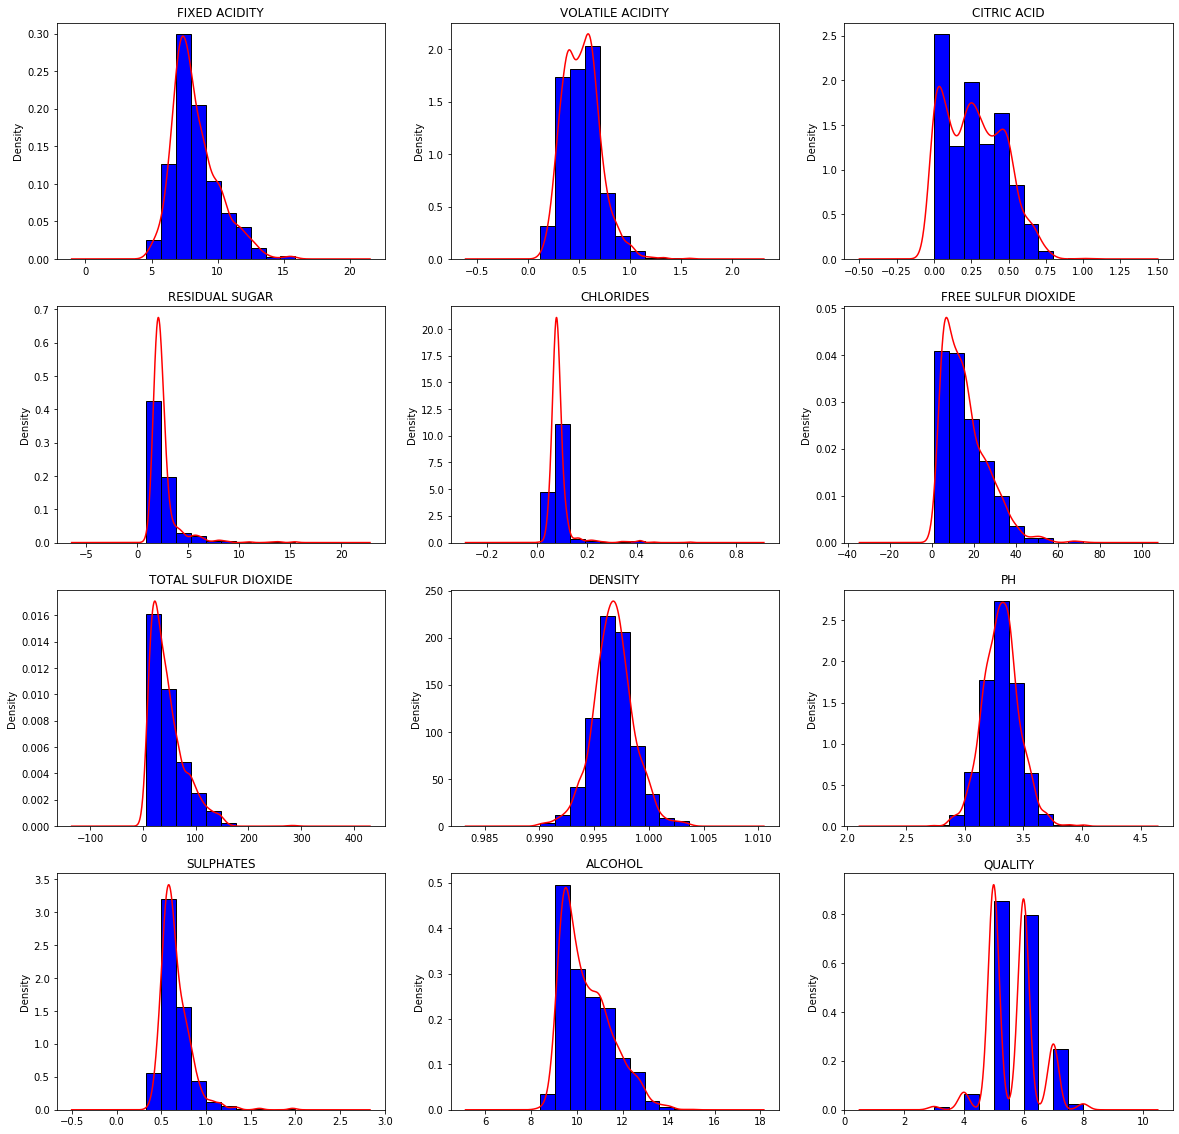

In [9]:
def draw_hist(df, variables, n_row, n_col):
    fig = plt.figure(figsize = (20,20))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_row, n_col, i+1)
        df[var].hist(bins = 10, ax = ax, color = 'blue', edgecolor = 'black', density = True)
        df[var].plot(kind='kde', color = 'red')
        ax.grid(False)
        ax.set_title(var.upper())
    plt.show()
    
draw_hist(red_wine, red_wine.columns, 4, 3)

Now, calculating skewness value for each variable

In [10]:
for i in list_variable:
    a = scipy.stats.skew(i, axis=0, bias=True)
    print('Skewness for ' + i.name + ' is ' + str(round(a, 2)))

Skewness for alcohol is 0.86
Skewness for pH is 0.19
Skewness for total sulfur dioxide is 1.51
Skewness for chlorides is 5.68
Skewness for citric acid is 0.32
Skewness for density is 0.07
Skewness for fixed acidity is 0.98
Skewness for free sulfur dioxide is 1.25
Skewness for residual sugar is 4.54
Skewness for sulphates is 2.43
Skewness for total sulfur dioxide is 1.51
Skewness for volatile acidity is 0.67
Skewness for quality is 0.22


After looking at the skewness value for each variable, we can infer that the all the dataset are somewhat skewed to the right

However, a few variables – chlorides, residual sugar, and sulphates have a high positive skewness value 

A few other variables, including pH, density, volatile acidity, citric acid, and quality have skewness values on the lower side, hence, they may be assumed to resemble normal distribution

## 3. Now, writing the code for visualizing box plots for all variables in red_wine dataset

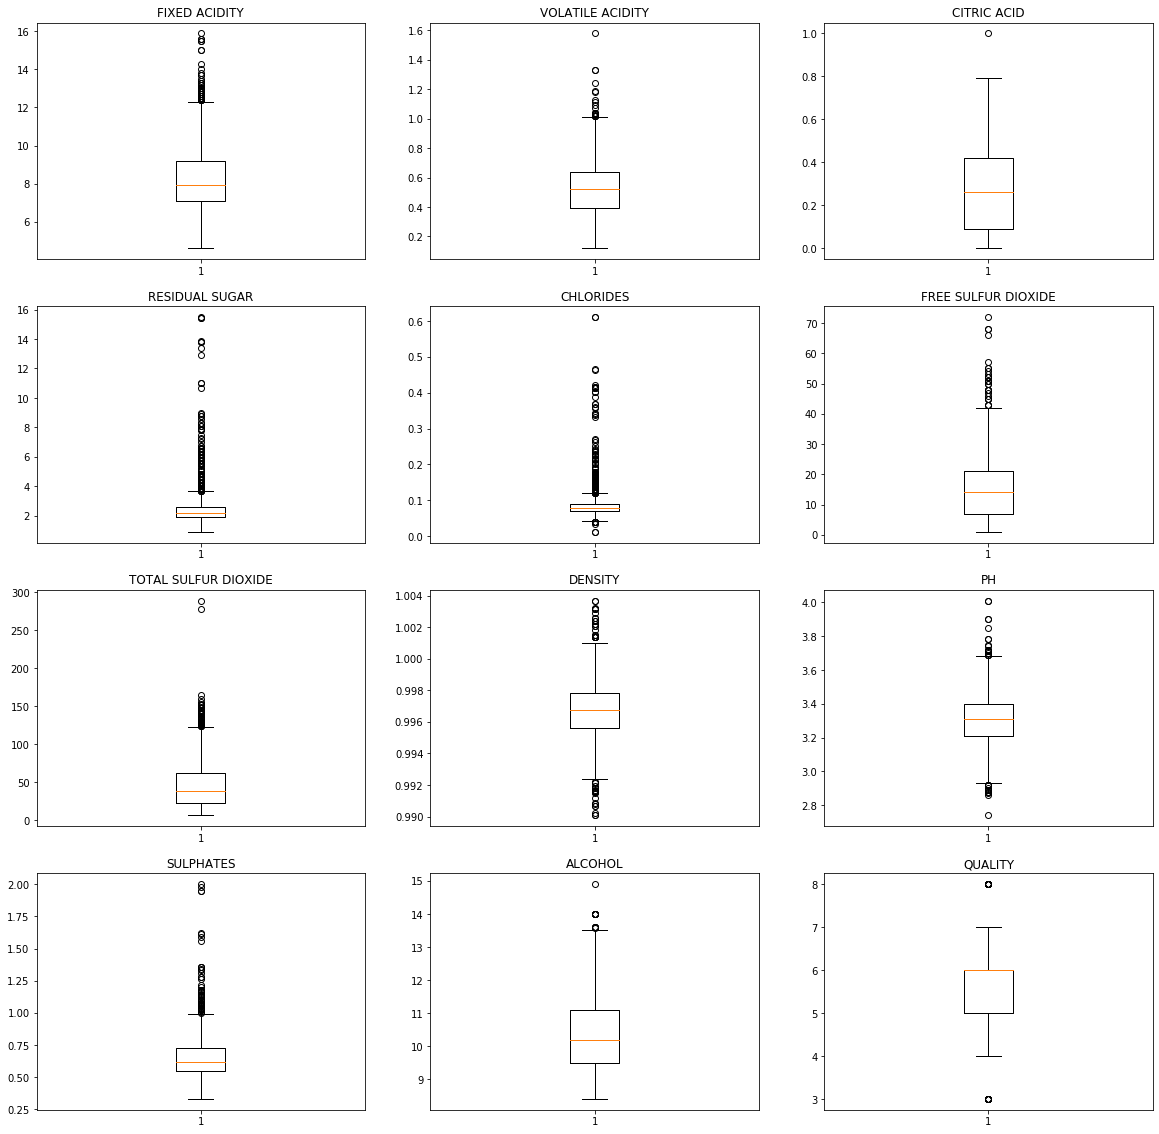

In [11]:
def draw_box(df, variables, n_row, n_col):
    fig = plt.figure(figsize = (20,20))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_row, n_col, i+1)
        plt.boxplot(df[var])
        plt.title(var.upper())
        ax.grid(False)
        
    plt.show()
    
draw_box(red_wine, red_wine.columns, 4, 3)

Finding Outliers in Data using Interquartile Range

Here, for each variable, we are going to calculate how many values are above and below the whiskers of boxplots

In [12]:
for i in list_variable:
    a = ((((i > (i.mean() + 2*i.std())) == 1) | ((i < (i.mean() - 2*i.std())) == 1)).sum())
    print('Number of values beyond the 4 times Interquartile Range of ' + i.name.upper() + ' data ' + ' : ' + str(a))

Number of values beyond the 4 times Interquartile Range of ALCOHOL data  : 70
Number of values beyond the 4 times Interquartile Range of PH data  : 75
Number of values beyond the 4 times Interquartile Range of TOTAL SULFUR DIOXIDE data  : 80
Number of values beyond the 4 times Interquartile Range of CHLORIDES data  : 45
Number of values beyond the 4 times Interquartile Range of CITRIC ACID data  : 35
Number of values beyond the 4 times Interquartile Range of DENSITY data  : 81
Number of values beyond the 4 times Interquartile Range of FIXED ACIDITY data  : 80
Number of values beyond the 4 times Interquartile Range of FREE SULFUR DIOXIDE data  : 66
Number of values beyond the 4 times Interquartile Range of RESIDUAL SUGAR data  : 75
Number of values beyond the 4 times Interquartile Range of SULPHATES data  : 59
Number of values beyond the 4 times Interquartile Range of TOTAL SULFUR DIOXIDE data  : 80
Number of values beyond the 4 times Interquartile Range of VOLATILE ACIDITY data  : 56
N

Now, as per the basic definition of outliers, the number of values mentioned above can be termed as outliers, however, in cases where the overall range is very small, or the data is ordinal, the values may or may not be counted as outliers